### Ogólne wprowadzenie

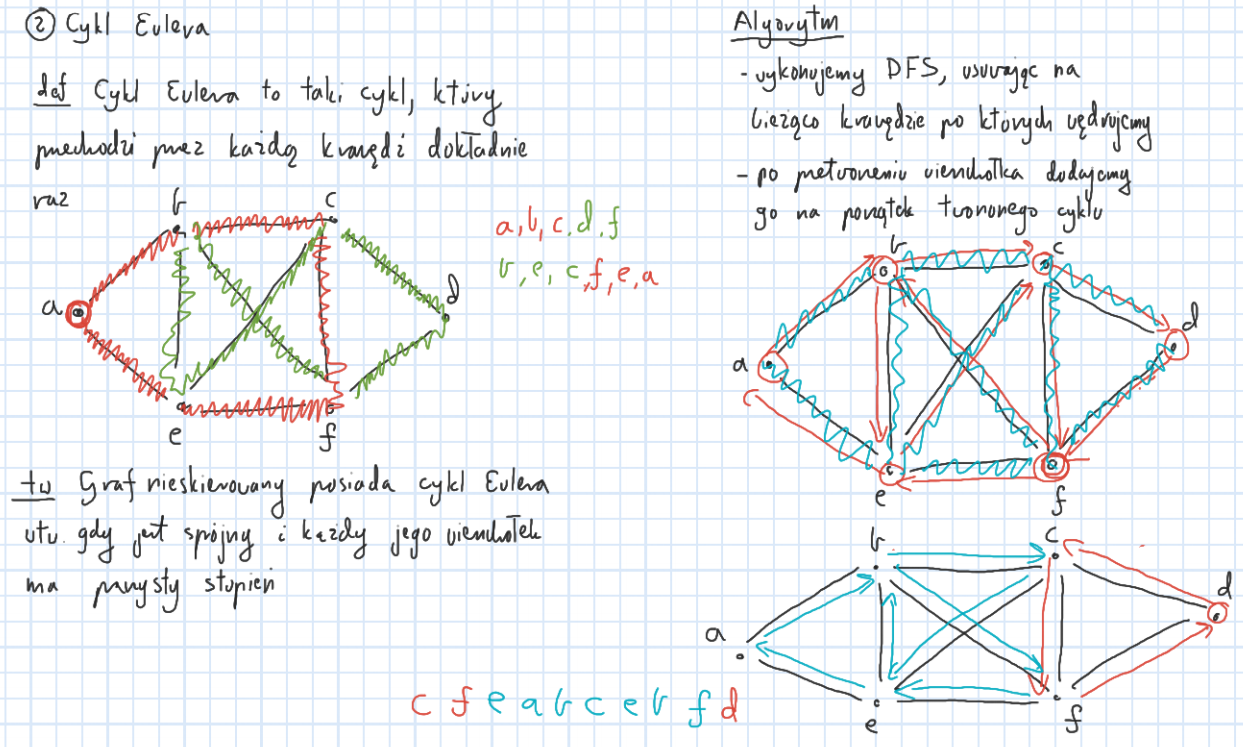

##### Fajny filmik, na temat cykli i ścieżek Eulera w grafie
###### LINK: https://www.youtube.com/watch?v=xR4sGgwtR2I
<br>

##### Oraz omówienie algorytmu dla grafów skierowanych
###### LINK: https://www.youtube.com/watch?v=8MpoO2zA2l4

##### Jeszcze inne dodatkowe źródło:
###### LINK: https://www.wikiwand.com/en/Eulerian_path

## Bez sprawdzania, czy graf jest Eulerowski

### Implementacja #1
#### Dla macierzowej reprezentacji grafu

###### UWAGA:
Poniższy algorytm jedynie tworzy cykl Eulera. Nie sprawdza on jednak, czy graf jest Eulerowski, więc jeżeli cykl Eulera nie istnieje, zwrócone zostaną błędne dane. Algorytm, który sprawdza, czy graf jest Eulerowski, zaimplementowany jest niżej (po algorytmach, które zwracają listę kolejno odwiedzanych wierzchołków w cyklu).

In [1]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M


def euler_cycle(G: 'graph represented using adjacency matrix'):
    n = len(G)
    result = []
    
    def dfs(i):
        for j in range(n):
            # Is still not visited
            if G[i][j] == 1:
                # Remove an edge (by replacing 1 with -1)
                G[i][j] = G[j][i] = -1  # I assume the graph is not directed
                dfs(j)
        result.append(i)
        
    # Run dfs algorithm to search for the euler cycle
    dfs(0)
        
    # Restore original values of edges (replace -1 with 1)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result

###### Kilka testów

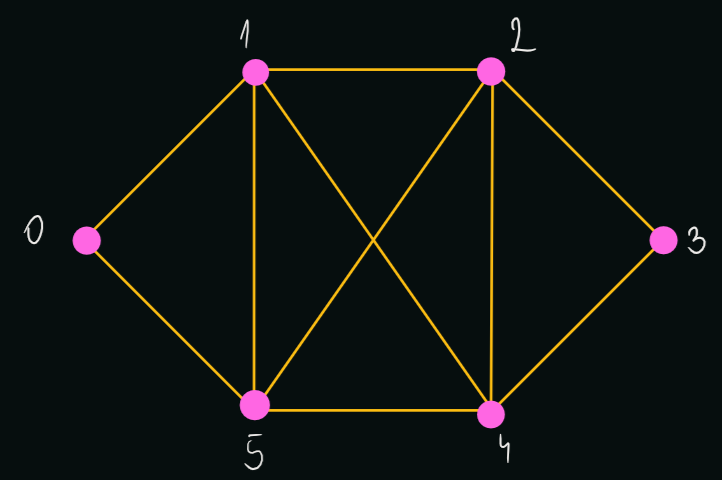

In [2]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_matrix(E, 6)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[0, 5, 4, 2, 5, 1, 4, 3, 2, 1, 0]

0 1 0 0 0 1
1 0 1 0 1 1
0 1 0 1 1 1
0 0 1 0 1 0
0 1 1 1 0 1
1 1 1 0 1 0


###### UWAGA:
Poniżej znajdują się przykłady, które pokazują, że dla grafów nieeulerowskich otrzymamy błędny rezultat.

##### Graf sześcianu (kostka $ Q_3 $):

In [3]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]

G = undirected_graph_matrix(E, 2 ** 3)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[3, 2, 1, 5, 6, 7, 4, 5, 0, 3, 2, 1, 0]

0 1 0 1 0 1 0 0
1 0 1 0 0 0 1 0
0 1 0 1 0 0 0 1
1 0 1 0 1 0 0 0
0 0 0 1 0 1 0 1
1 0 0 0 1 0 1 0
0 1 0 0 0 1 0 1
0 0 1 0 1 0 1 0


##### Ścieżka $ P_4 $:

In [4]:
E = [(0, 1), (1, 2), (2, 3)]

G = undirected_graph_matrix(E, 4)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[3, 2, 1, 0]

0 1 0 0
1 0 1 0
0 1 0 1
0 0 1 0


##### Gwiazda $ S_3 $:

In [5]:
E = [(0, 1), (0, 2), (0, 3)]

G = undirected_graph_matrix(E, 4)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[1, 2, 3, 0]

0 1 1 1
1 0 0 0
1 0 0 0
1 0 0 0


### Implementacja #2
#### Dla listowej reprezentacji grafu

In [6]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G


def euler_cycle(G: 'graph represented using adjacency lists'):
    n = len(G)
    result = []
    visited = [[False] * n for _ in range(n)]
            
    def dfs(u):
        for v in G[u]:
            if not visited[u][v]:
                visited[u][v] = visited[v][u] = True
                dfs(v)
        result.append(u)
        
    dfs(0)
            
    return result

###### Kilka testów

In [7]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_list(E, 6)
print(*G, sep='\n', end='\n\n')
print(euler_cycle(G))

[1, 5]
[0, 2, 5, 4]
[1, 3, 5, 4]
[2, 4]
[3, 5, 1, 2]
[4, 0, 1, 2]

[0, 5, 2, 4, 1, 5, 4, 3, 2, 1, 0]


## Ze sprawdzeniem, czy graf jest eulerowski

###### Uwaga:
W poniższych implementacjach wyznaczam stopień każdego z wierzchołków. Zamiast tego można by po prostu sprawdzić, czy otrzymana tablica $ result $ zwiera na początku i na końcu ten sam wierzchołek. Wówczas oznaczałoby to, że znaleźliśmy cykl, ponieważ mamy pewność, że zostały odwiedzone wszystkie wierzchołki grafu (przy założeniu, że jest on spójny, bo inaczej to bez sensu szukać cyklu lub ścieżki Eulera), a algorytm działał w każdym kroku w taki sposób, że dołączał każdy cykl do poprzedniego. Przy szukaniu ścieżki Eulera wystarczyłoby natomiast sprawdzić, czy każda krawędź została odwiedzona. W implementacjach niżej sprawdzam również, czy graf jest spójny.

###### UWAGA:
Zakładam, że graf, który jest niespójny (ale jest spójny krawędziowo), nie jest grafem eulerowskim. W związku z tym, nie dopuszczam możliwości takiej, że w grafie, w którym występują wierzchołki izolowane (stopnia 0), może wystąpić cykl Eulera lub ścieżka Eulera (nawet, jeżeli możliwe jest przejście przez wszystkie krawędzie). <br>
Opis problemu z forum matematycznego: <br>
LINK: https://matematyka.pl/viewtopic.php?t=297414

### Implementacja #1
#### Dla macierzowej reprezentacji grafu
##### Ze sprawdzaniem podczas tworzenia ścieżki

In [8]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M


def is_consistent(G: 'graph represented using adjacency matrix'):
    n = len(G)
    visited = [False] * n
    
    def dfs(i):
        visited[i] = True
        for j in range(n):
            if G[i][j] and not visited[j]:
                dfs(j)
                
    dfs(0)
    return all(visited)
    

def euler_cycle(G: 'graph represented using adjacency matrix'):
    if not is_consistent(G): return []
    n = len(G)
    result = []
    
    def dfs(i):
        deg = 0
        for j in range(n):
            # If has an edge no matter if visited or not
            if G[i][j]:
                deg += 1
                # Is still not visited
                if G[i][j] == 1:
                    # Remove an edge (by replacing 1 with -1)
                    G[i][j] = G[j][i] = -1  # I assume the graph is not directed
                    if not dfs(j): return False
        # If a vertex has odd degree, return False as a graph isn't euleran
        if deg % 2: return False
        result.append(i)
        return True
        
    # Run dfs algorithm to search for the euler cycle
    # (if a graph isn't eulerian, return empty array)
    if not dfs(0):
        result = []
        
    # Restore original values of edges (replace -1 with 1)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result

###### Kilka testów

In [9]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_matrix(E, 6)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[0, 5, 4, 2, 5, 1, 4, 3, 2, 1, 0]

0 1 0 0 0 1
1 0 1 0 1 1
0 1 0 1 1 1
0 0 1 0 1 0
0 1 1 1 0 1
1 1 1 0 1 0


###### UWAGA:
Poniżej znajdują się przykłady, które pokazują, że dla grafów nieeulerowskich otrzymamy błędny rezultat.

##### Graf sześcianu (kostka $ Q_3 $):

In [10]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]

G = undirected_graph_matrix(E, 2 ** 3)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[]

0 1 0 1 0 1 0 0
1 0 1 0 0 0 1 0
0 1 0 1 0 0 0 1
1 0 1 0 1 0 0 0
0 0 0 1 0 1 0 1
1 0 0 0 1 0 1 0
0 1 0 0 0 1 0 1
0 0 1 0 1 0 1 0


##### Ścieżka $ P_4 $:

In [11]:
E = [(0, 1), (1, 2), (2, 3)]

G = undirected_graph_matrix(E, 4)
print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[]

0 1 0 0
1 0 1 0
0 1 0 1
0 0 1 0


##### Graf pusty $ N_8 $:

In [12]:
G = [[0] * 8 for _ in range(8)]

print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[]

0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0


### Implementacja #2
#### Dla macierzowej reprezentacji grafu
##### Z osobną funkcją która sprawdza, czy graf jest eulerowski (+ ścieżka Eulera)

###### UWAGA:
Algorytm znajdowania ściezki Eulera jest taki sam, jak algorytm, który znajduje cykl Eulera. Z tego powodu, jeżeli interesuje nas albo cykl Eulera, jeżeli graf posiada cykl Eulera, albo ścieżka Eulera (bez sprecyzowania, że ma to być koniecznie cykl lub koniecznie ścieżka), możemy oba algorytmy połączyć w jeden i sprawdzić za jednym razem, czy graf posiada cykl lub ścieżkę Eulera oraz, jeżeli posiada jedno z nich, to zwrócić listę kolejnych wierzchołków, które do niego/niej należą.

In [13]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M


def is_consistent(G: 'graph represented using adjacency matrix'):
    n = len(G)
    visited = [False] * n
    
    def dfs(i):
        visited[i] = True
        for j in range(n):
            if G[i][j] and not visited[j]:
                dfs(j)
                
    dfs(0)
    return all(visited)


def has_euler_cycle(G: 'graph represented using adjacency matrix'):
    if not is_consistent(G): return False
    n = len(G)
    # Check for each vertex if its degree is even
    for i in range(n):
        deg = 0
        for j in range(n):
            if G[i][j]: deg += 1
        # If a degree of a vertex is odd, return False as a graph cannot have euler cycle
        if deg % 2:
            return False
    return True


def has_euler_path(G: 'graph represented using adjacency matrix'):
    if not is_consistent(G): return False, -1
    n = len(G)
    odd_count = 0
    odd_vertex = None
    # Check for each vertex if its degree is even
    for i in range(n):
        deg = 0
        for j in range(n):
            if G[i][j]: deg += 1
        # If a degree of a vertex is odd, increment a number of odd degree vertices
        # and check if we exceeded the maximum number of odd degree vertices
        if deg % 2:
            odd_vertex = i
            odd_count += 1
            if odd_count > 2:
                return False, -1
    return (True, odd_vertex) if odd_count == 2 else (False, -1)
            

def euler_cycle(G: 'graph represented using adjacency matrix'):
    # Check if a graph has an euler cycle
    if not has_euler_cycle(G): return []
    
    n = len(G)
    result = []
    
    def dfs(i):
        for j in range(n):
            # Is still not visited
            if G[i][j] == 1:
                # Remove an edge (by replacing 1 with -1)
                G[i][j] = G[j][i] = -1  # I assume the graph is not directed
                dfs(j)
        result.append(i)
        
    # Run dfs algorithm to search for the euler cycle
    dfs(0)
        
    # Restore original values of edges (replace -1 with 1)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result


# Algorytm identyczny do tego, który znajduje cykl##### Graf Petersena:
def euler_path(G: 'graph represented using adjacency matrix'):
    has_path, begin_i = has_euler_path(G)
    if not has_path: return []
    
    n = len(G)
    result = []
    
    def dfs(i):
        for j in range(n):
            # Is still not visited
            if G[i][j] == 1:
                # Remove an edge (by replacing 1 with -1)
                G[i][j] = G[j][i] = -1  # I assume the graph is not directed
                dfs(j)
        result.append(i)
        
    # Run dfs algorithm to search for the euler path
    # (We must start from a vertex of odd degree)
    dfs(begin_i)
        
    # Restore original values of edges (replace -1 with 1)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result

###### Kilka testów

In [14]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_matrix(E, 6)
print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 4, 2, 5, 1, 4, 3, 2, 1, 0]

Path:  []

0 1 0 0 0 1
1 0 1 0 1 1
0 1 0 1 1 1
0 0 1 0 1 0
0 1 1 1 0 1
1 1 1 0 1 0


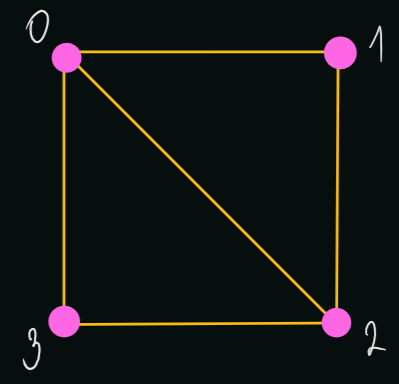

In [15]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]

G = undirected_graph_matrix(E, 4)
print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: []

Path:  [0, 3, 2, 1, 0, 2]

0 1 1 1
1 0 1 0
1 1 0 1
1 0 1 0


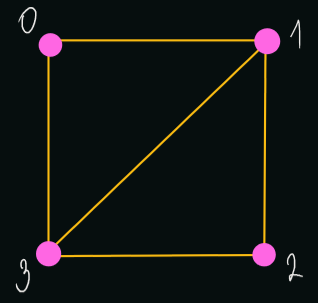

In [16]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]

G = undirected_graph_matrix(E, 4)
print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: []

Path:  [1, 3, 2, 1, 0, 3]

0 1 0 1
1 0 1 1
0 1 0 1
1 1 1 0


##### Graf sześcianu (kostka $ Q_3 $):

In [17]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]

G = undirected_graph_matrix(E, 2 ** 3)
print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: []

Path:  []

0 1 0 1 0 1 0 0
1 0 1 0 0 0 1 0
0 1 0 1 0 0 0 1
1 0 1 0 1 0 0 0
0 0 0 1 0 1 0 1
1 0 0 0 1 0 1 0
0 1 0 0 0 1 0 1
0 0 1 0 1 0 1 0


##### Graf Petersena:

In [18]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: []

Path:  []

0 1 0 0 1 0 1 0 0 0
1 0 1 0 0 0 0 1 0 0
0 1 0 1 0 0 0 0 1 0
0 0 1 0 1 0 0 0 0 1
1 0 0 1 0 1 0 0 0 0
0 0 0 0 1 0 0 1 1 0
1 0 0 0 0 0 0 0 1 1
0 1 0 0 0 1 0 0 0 1
0 0 1 0 0 1 1 0 0 0
0 0 0 1 0 0 1 1 0 0


##### Ścieżka $ P_5 $:

In [19]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: []

Path:  [0, 1, 2, 3, 4]

0 1 0 0 0
1 0 1 0 0
0 1 0 1 0
0 0 1 0 1
0 0 0 1 0


##### Graf pusty $ N_1 $:

In [20]:
G = [[0]]  # No connections here (only one vertex)

print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0]

Path:  []

0


##### Graf pusty $ N_8 $:

In [21]:
G = [[0] * 8 for _ in range(8)]

print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[]

0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0


##### Cykl $ C_5 $:

In [22]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 4, 3, 2, 1, 0]

Path:  []

0 1 0 0 1
1 0 1 0 0
0 1 0 1 0
0 0 1 0 1
1 0 0 1 0


##### Cykl $ C_6 $:

In [23]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_matrix(E, 6)

print('Cycle:', euler_cycle(G), end='\n\n')
print('Path: ', euler_path(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 4, 3, 2, 1, 0]

Path:  []

0 1 0 0 0 1
1 0 1 0 0 0
0 1 0 1 0 0
0 0 1 0 1 0
0 0 0 1 0 1
1 0 0 0 1 0


### Implementacja #3
#### Dla macierzowej reprezentacji grafu
##### Ze sprawdzeniem, czy istnieje ścieżka lub cykl Eulera i zwróceniem odpowiednio ścieżki lub cyklu.

In [24]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M


def is_consistent(G: 'graph represented using adjacency matrix'):
    n = len(G)
    visited = [False] * n
    
    def dfs(i):
        visited[i] = True
        for j in range(n):
            if G[i][j] and not visited[j]:
                dfs(j)
                
    dfs(0)
    return all(visited)


# Checks if a graph has either an euler cycle or an euler path
# Returns:
# 0 - if there is neither euler cycle nor euler path in a graph,
# 1 - if there is euler cycle,
# 2 - if there is euler path.
def is_eulerian(G: 'graph represented using adjacency matrix'):
    if not is_consistent(G): return 0, -1
    n = len(G)
    odd_count = 0
    begin_vertex = 0
    # Check for each vertex if its degree is even
    for i in range(n):
        deg = 0
        for j in range(n):
            if G[i][j]: deg += 1
        # If a degree of a vertex is odd, increment a number of odd degree vertices
        # and check if we exceeded the maximum number of odd degree vertices
        if deg % 2:
            begin_vertex = i
            odd_count += 1
            if odd_count > 2:
                return 0, -1
    if odd_count == 0: return 1, begin_vertex
    if odd_count == 2: return 2, begin_vertex
    return 0, -1
            
# Generate either an euler cycle or an euler path
def euler(G: 'graph represented using adjacency matrix'):
    # Check if a graph has an euler cycle or an euler path
    g_type, begin_i = is_eulerian(G)
    if g_type == 0: return [], g_type
    
    n = len(G)
    result = []
    
    def dfs(i):
        for j in range(n):
            # Is still not visited
            if G[i][j] == 1:
                # Remove an edge (by replacing 1 with -1)
                G[i][j] = G[j][i] = -1  # I assume the graph is not directed
                dfs(j)
        result.append(i)
        
    # Run dfs algorithm to search for the euler cycle
    dfs(begin_i)
        
    # Restore original values of edges (replace -1 with 1)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result, g_type

###### Kilka testów

In [25]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_matrix(E, 6)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 4, 2, 5, 1, 4, 3, 2, 1, 0]

0 1 0 0 0 1
1 0 1 0 1 1
0 1 0 1 1 1
0 0 1 0 1 0
0 1 1 1 0 1
1 1 1 0 1 0


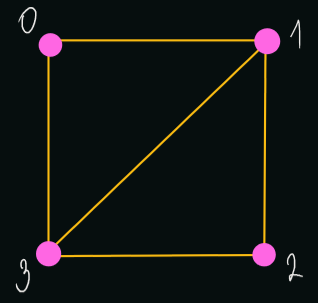

In [26]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]

G = undirected_graph_matrix(E, 4)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Path: [1, 3, 2, 1, 0, 3]

0 1 0 1
1 0 1 1
0 1 0 1
1 1 1 0


##### Graf sześcianu (kostka $ Q_3 $):

In [27]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]

G = undirected_graph_matrix(E, 2 ** 3)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Nothing []

0 1 0 1 0 1 0 0
1 0 1 0 0 0 1 0
0 1 0 1 0 0 0 1
1 0 1 0 1 0 0 0
0 0 0 1 0 1 0 1
1 0 0 0 1 0 1 0
0 1 0 0 0 1 0 1
0 0 1 0 1 0 1 0


##### Graf Petersena:

In [28]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Nothing []

0 1 0 0 1 0 1 0 0 0
1 0 1 0 0 0 0 1 0 0
0 1 0 1 0 0 0 0 1 0
0 0 1 0 1 0 0 0 0 1
1 0 0 1 0 1 0 0 0 0
0 0 0 0 1 0 0 1 1 0
1 0 0 0 0 0 0 0 1 1
0 1 0 0 0 1 0 0 0 1
0 0 1 0 0 1 1 0 0 0
0 0 0 1 0 0 1 1 0 0


##### Ścieżka $ P_5 $:

In [29]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Path: [0, 1, 2, 3, 4]

0 1 0 0 0
1 0 1 0 0
0 1 0 1 0
0 0 1 0 1
0 0 0 1 0


##### Graf pusty $ N_1 $:

In [30]:
G = [[0]]  # No connections here (only one vertex)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0]

0


##### Cykl $ C_5 $:

In [31]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 4, 3, 2, 1, 0]

0 1 0 0 1
1 0 1 0 0
0 1 0 1 0
0 0 1 0 1
1 0 0 1 0


##### Cykl $ C_6 $:

In [32]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_matrix(E, 6)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 4, 3, 2, 1, 0]

0 1 0 0 0 1
1 0 1 0 0 0
0 1 0 1 0 0
0 0 1 0 1 0
0 0 0 1 0 1
1 0 0 0 1 0


##### Graf pusty $ N_8 $:

In [33]:
G = [[0] * 8 for _ in range(8)]

print(euler_cycle(G), end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[]

0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0


### Implementacja #4
#### Dla reprezentacji grafu w postaci list sąsiedztwa
##### Ze sprawdzeniem, czy istnieje ścieżka lub cykl Eulera i zwróceniem odpowiednio ścieżki lub cyklu.

In [34]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G


def is_consistent(G: 'graph represented using adjacency list'):
    n = len(G)
    visited = [False] * n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
                
    dfs(0)
    return all(visited)

# Checks if a graph has either an euler cycle or an euler path
# Returns:
# 0 - if there is neither euler cycle nor euler path in a graph,
# 1 - if there is euler cycle,
# 2 - if there is euler path.
def is_eulerian(G: 'graph represented using adjacency list'):
    if not is_consistent(G): return 0, -1
    n = len(G)
    odd_count = 0
    begin_vertex = 0
    # Check for each vertex if its degree is even
    for u in range(n):
        if len(G[u]) % 2:
            odd_count += 1
            begin_vertex = u
    if odd_count == 0: return 1, begin_vertex
    if odd_count == 2: return 2, begin_vertex
    return 0, -1
            
# Generate either an euler cycle or an euler path
def euler(G: 'graph represented using adjacency list'):
    # Check if a graph has an euler cycle or an euler path
    g_type, begin_u = is_eulerian(G)
    if g_type == 0: return [], g_type
    
    n = len(G)
    result = []
    visited = [[False] * n for _ in range(n)]
    
    def dfs(u):
        for v in G[u]:
            if not visited[u][v]:
                visited[u][v] = visited[v][u] = True
                dfs(v)
        result.append(u)
            
    dfs(begin_u)
            
    return result, g_type

###### Kilka testów

In [35]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 5), (1, 4), (2, 5), (2, 4)]

G = undirected_graph_list(E, 6)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 2, 4, 1, 5, 4, 3, 2, 1, 0]

1 5
0 2 5 4
1 3 5 4
2 4
3 5 1 2
4 0 1 2


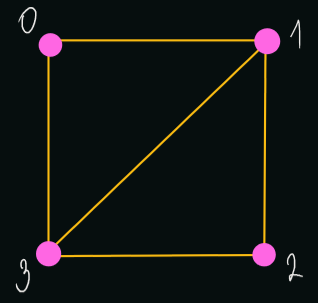

In [36]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]

G = undirected_graph_list(E, 4)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Path: [1, 3, 0, 1, 2, 3]

1 3
0 2 3
1 3
2 0 1


##### Graf sześcianu (kostka $ Q_3 $):

In [37]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]

G = undirected_graph_list(E, 2 ** 3)
result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Nothing []

1 3 5
0 2 6
1 3 7
2 0 4
5 7 3
4 6 0
5 7 1
6 4 2


##### Graf Petersena:

In [38]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E, 10)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Nothing []

1 6 4
0 7 2
1 8 3
2 4 9
0 3 5
4 8 7
0 8 9
1 5 9
2 6 5
3 7 6


##### Ścieżka $ P_5 $:

In [39]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E, 5)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Path: [0, 1, 2, 3, 4]

1
0 2
1 3
2 4
3


##### Graf pusty $ N_1 $:

In [40]:
G = [[0]]  # No connections here (only one vertex)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Nothing []

0


##### Cykl $ C_5 $:

In [41]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E, 5)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 4, 3, 2, 1, 0]

1 4
0 2
1 3
2 4
3 0


##### Cykl $ C_6 $:

In [42]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_list(E, 6)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

Cycle: [0, 5, 4, 3, 2, 1, 0]

1 5
0 2
1 3
2 4
3 5
4 0


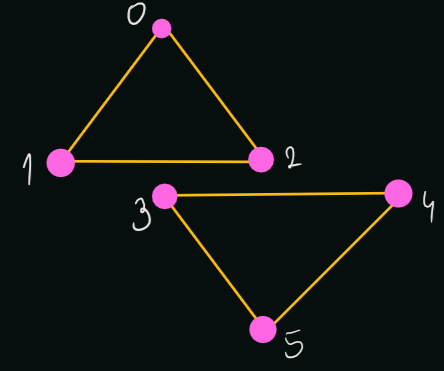

In [43]:
E = [(0, 1), (0, 2), (1, 2), (3, 4), (3, 5), (4, 5)]
G = undirected_graph_list(E, 6)
print(G)

result, g_type = euler(G)
print('Cycle:' if g_type == 1 else 'Path:' if g_type == 2 else 'Nothing', result, end='\n\n')
print(*(' '.join(map(str, row)) for row in G), sep='\n')

[[1, 2], [0, 2], [0, 1], [4, 5], [3, 5], [3, 4]]
Nothing []

1 2
0 2
0 1
4 5
3 5
3 4
